# `classification.XGBoostCVClassifier`

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import slickml

print(f"Loaded SlickML Version = {slickml.__version__}")

Loaded SlickML Version = 0.2.0b0


In [19]:
from slickml.classification import XGBoostCVClassifier

help(XGBoostCVClassifier)

Help on class XGBoostCVClassifier in module slickml.classification._xgboostcv:

class XGBoostCVClassifier(slickml.classification._xgboost.XGBoostClassifier)
 |  XGBoostCVClassifier(num_boost_round: Optional[int] = 200, metrics: Optional[str] = 'auc', sparse_matrix: Optional[bool] = False, scale_mean: Optional[bool] = False, scale_std: Optional[bool] = False, importance_type: Optional[str] = 'total_gain', params: Optional[Dict] = None, n_splits: Optional[int] = 4, early_stopping_rounds: Optional[int] = 20, random_state: Optional[int] = 1367, stratified: Optional[bool] = True, shuffle: Optional[bool] = True, verbose: Optional[bool] = True, callbacks: Optional[bool] = False) -> None
 |  
 |  XGBoost CV Classifier.
 |  
 |  This is wrapper using ``XGBoostClassifier`` to train a XGBoost [1]_ model with using the optimum
 |  number of boosting rounds from the inputs. It used ``xgboost.cv()`` model with n-folds
 |  cross-validation and train model based on the best number of boosting round to

### Example 1: `XGBoostCVClassifer` mode for `breast-cancer` data set

In [4]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

data = load_breast_cancer()

X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    shuffle=True,
    stratify=y,
)

In [5]:
# custom params
params = {
    "eval_metric": "auc",
    "learning_rate": 0.05,
    "max_depth": 2,
    "min_child_weight": 1,
    "gamma": 0.0,
}
clf = XGBoostCVClassifier(
    num_boost_round=333,
    metrics=("logloss"),
    params=params,
)
clf.fit(X_train, y_train)

*-* Best Boosting Round = 188 -*- 4-Folds CV LOGLOSS: Train = 0.023 +/- 0.004 -*- Test = 0.124 +/- 0.051 *-*


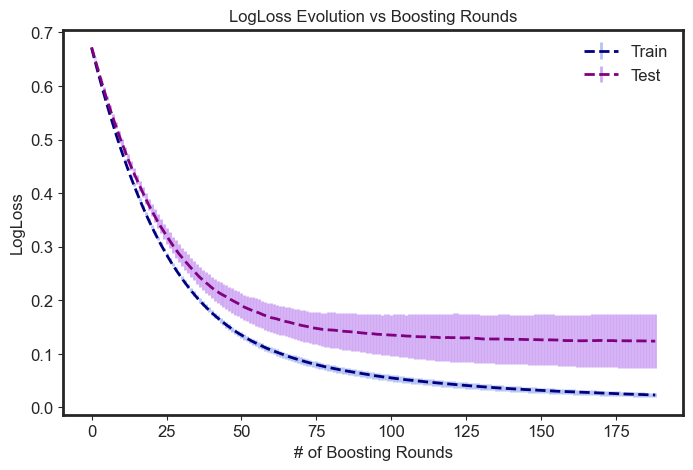

In [6]:
clf.plot_cv_results()

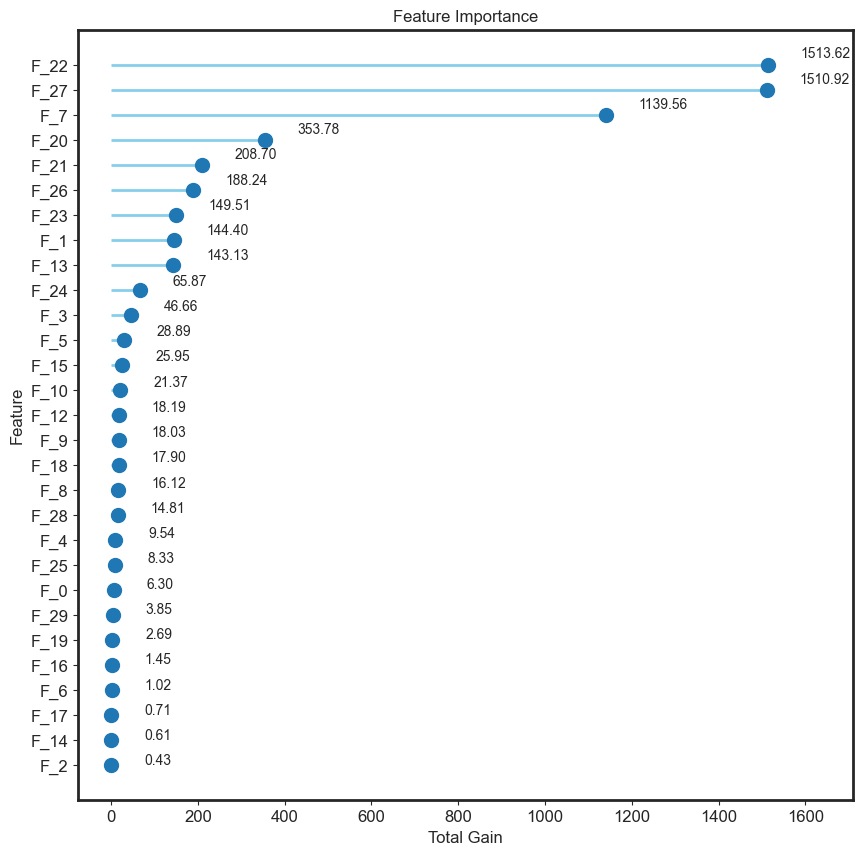

In [7]:
clf.plot_feature_importance(figsize=(10, 10))

In [8]:
# predic proba (or clf.y_pred_proba_)
# please note that y_test is optional
y_pred_proba = clf.predict_proba(X_test, y_test=None)
y_pred_proba[:10]

array([0.988025  , 0.0036808 , 0.9972811 , 0.002034  , 0.01257452,
       0.99519277, 0.99677867, 0.94639426, 0.09460717, 0.00286642],
      dtype=float32)

In [9]:
# pred class (or clf.y_pred_)
# threshold can be set
y_pred = clf.predict(X_test, threshold=0.67)
y_pred[:10]

array([1, 0, 1, 0, 0, 1, 1, 1, 0, 0])

In [10]:
# pred class (or clf.y_pred_)
# threshold can be set
y_pred = clf.predict(X_test, threshold=0.67)
y_pred[:10]

array([1, 0, 1, 0, 0, 1, 1, 1, 0, 0])

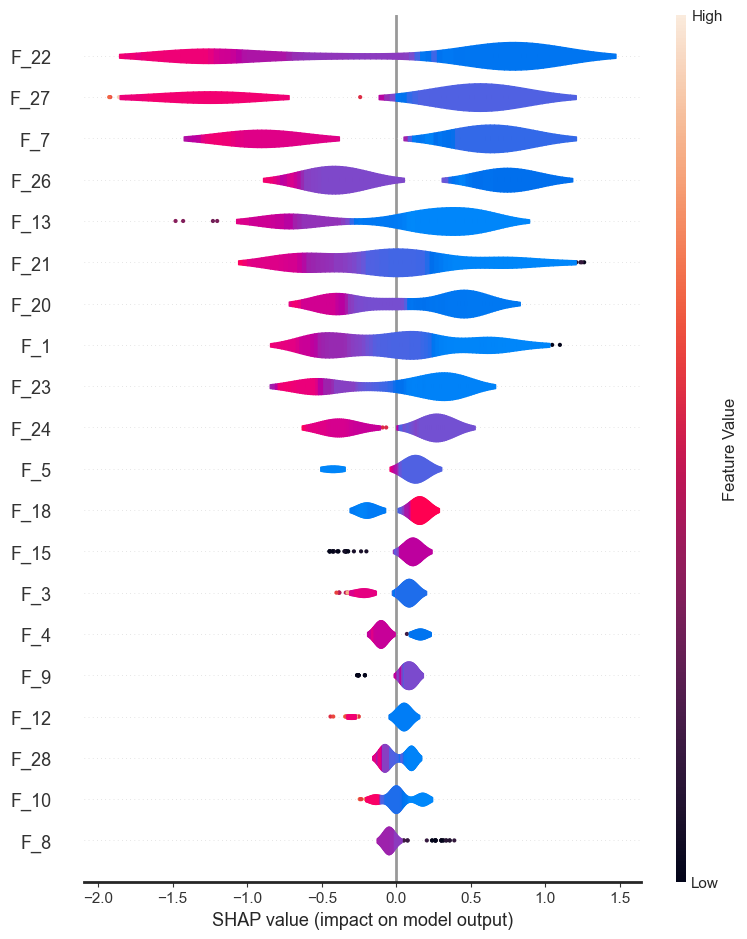

In [11]:
# shap summary plot violin on test data
clf.plot_shap_summary(plot_type="violin", validation=True)

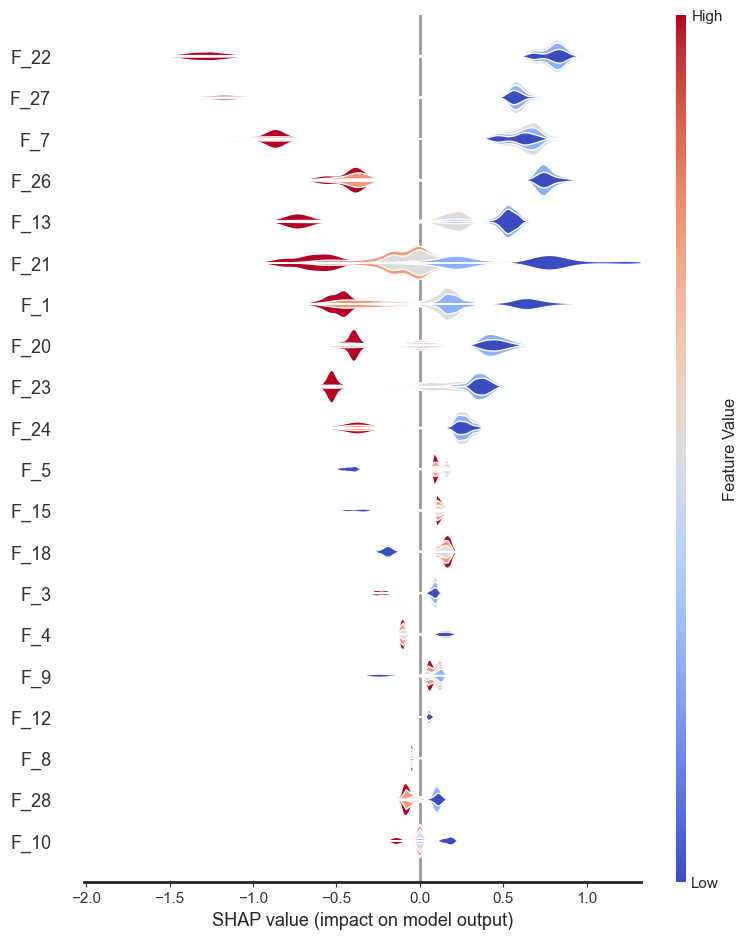

In [12]:
# shap summary plot layered violin plot on train data
clf.plot_shap_summary(
    plot_type="layered_violin",
    validation=False,
    layered_violin_max_num_bins=5,
)

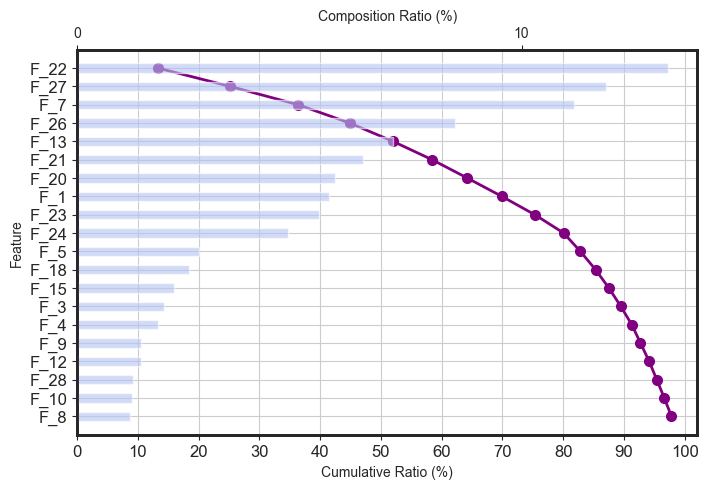

In [13]:
# shap waterfall plot
clf.plot_shap_waterfall()

In [14]:
clf.shap_values_test_[:10]

array([[ 2.93060485e-02, -3.79647374e-01,  9.55326576e-03,
         9.91260707e-02,  1.64401799e-01, -4.31466639e-01,
         9.51001421e-03,  6.31062567e-01, -5.08083105e-02,
         1.26443028e-01,  3.60812806e-03,  0.00000000e+00,
         5.75440787e-02,  2.65633464e-01, -3.17144440e-03,
        -4.20582622e-01, -7.47647230e-03,  4.51785512e-03,
         1.79038331e-01, -2.45055947e-02,  4.49749768e-01,
        -2.47486308e-02,  8.01595628e-01,  3.99926633e-01,
         2.65917480e-01,  1.10106468e-02,  7.28246748e-01,
         5.67125082e-01,  1.00982055e-01,  1.32332016e-02],
       [-1.50321797e-02, -4.70711499e-01, -3.71276587e-03,
        -2.06808582e-01, -1.08128808e-01,  8.74728337e-02,
        -2.96530705e-02, -1.00684118e+00, -5.37627302e-02,
         4.88378070e-02, -2.05762833e-02,  0.00000000e+00,
         3.54140811e-02,  1.43666998e-01,  1.39122186e-02,
         1.08292639e-01,  1.00863827e-02, -7.05369469e-03,
         1.23083621e-01,  4.37549502e-02, -3.50264311e-

In [15]:
clf.shap_values_train_[:10]

array([[-0.01503218, -0.4752687 , -0.00371277, -0.2643935 , -0.10781923,
         0.08747283, -0.02271134, -0.8319148 , -0.06592637,  0.03236278,
        -0.02319557,  0.        ,  0.03541408, -0.6085304 ,  0.01391222,
         0.10321777,  0.01008638,  0.00451786, -0.1737677 , -0.01258019,
        -0.4071247 , -0.69848466, -1.1379007 , -0.5249705 , -0.27066854,
        -0.01822624, -0.42918122, -1.2035952 , -0.08528651,  0.01012715],
       [ 0.00954844, -0.03467957,  0.00955327,  0.09912607,  0.13538933,
        -0.43327194,  0.00360366,  0.684336  ,  0.20898694, -0.25329927,
         0.12293398,  0.        ,  0.05915376,  0.5587489 ,  0.004056  ,
        -0.4308565 , -0.00747647,  0.00451786,  0.12615027, -0.02450559,
         0.01139558, -0.02094031,  0.7502504 ,  0.02998934,  0.22358076,
         0.01750304,  0.83540416,  0.6624068 ,  0.09714281,  0.01876235],
       [-0.01503218, -0.4752687 , -0.00371277, -0.2643935 , -0.11397108,
         0.08747283, -0.02271134, -0.8319148 , -0

In [16]:
# cv_results (or clf.cv_results_)
cvr = clf.get_cv_results()
cvr.tail()

,train-logloss-mean,train-logloss-std,test-logloss-mean,test-logloss-std
184,0.024038,0.004095,0.124201,0.050520
185,0.023854,0.004074,0.124068,0.050663
186,0.023683,0.004066,0.124070,0.050854
187,0.023493,0.004049,0.123906,0.050950
188,0.023325,0.004032,0.123768,0.050848


In [17]:
# feature importance (or clf.feature_importance_)
clf.get_feature_importance()

,feature,total_gain
0,F_22,1513.623779
1,F_27,1510.920044
2,F_7,1139.560913
3,F_20,353.783478
4,F_21,208.704620
5,F_26,188.236313
6,F_23,149.507141
7,F_1,144.395508
8,F_13,143.126877
9,F_24,65.866081


In [18]:
clf.model_

## You can use the `BinaryClassificationMetrics` class to evaluate your model

In [20]:
from slickml.metrics import BinaryClassificationMetrics

metrics = BinaryClassificationMetrics(y_test, y_pred_proba)

,Accuracy,Balanced Accuracy,ROC AUC,PR AUC,Precision,Recall,Average Precision,F-1 Score,F-2 Score,F-0.50 Score,Threat Score,TP,TN,FP,FN
Threshold = 0.500 | Average = Binary,0.971000,0.970000,0.996000,0.998000,0.981000,0.972000,0.998000,0.977000,0.974000,0.979000,0.954000,104,62,2,3


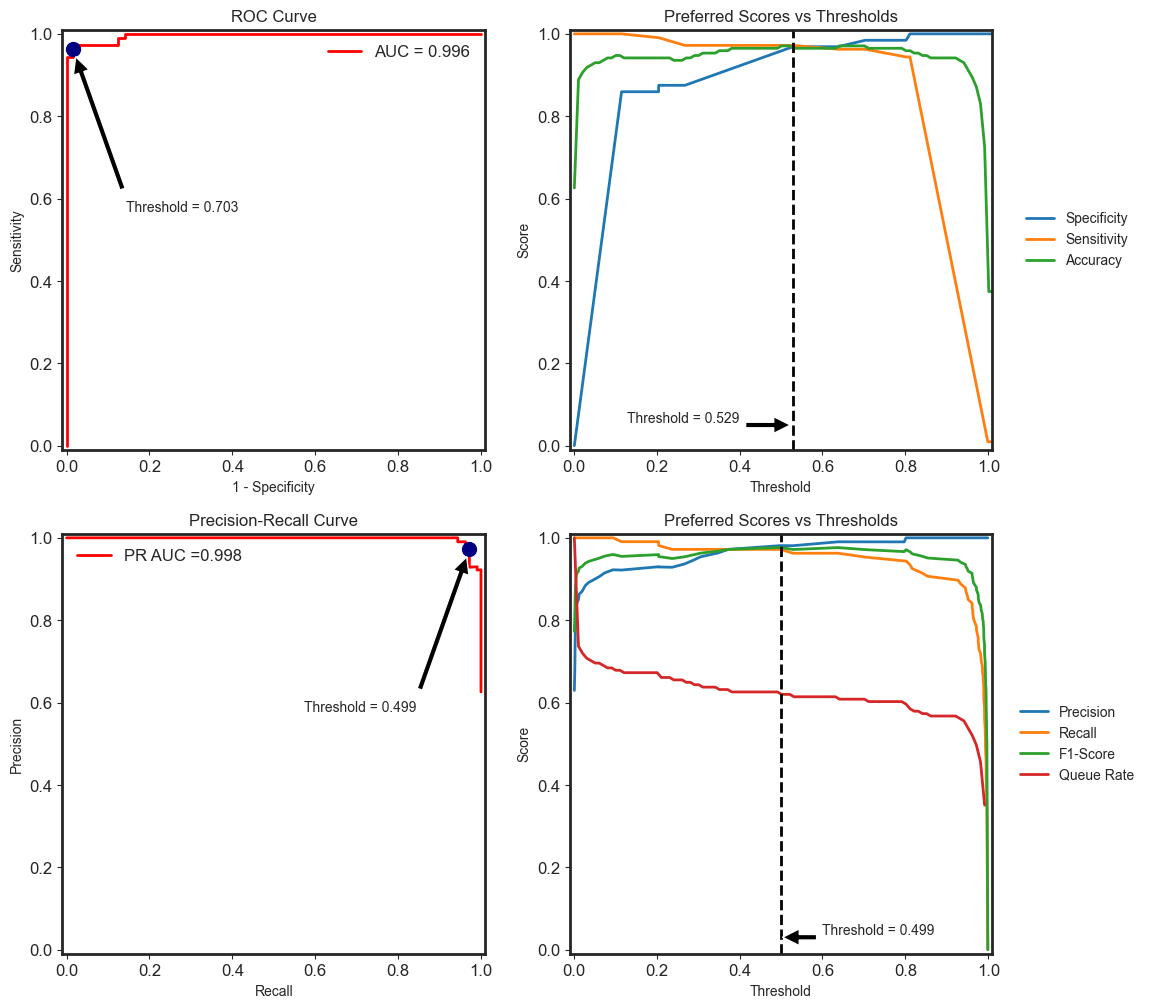

In [21]:
metrics.plot()